In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%cd ../experiments/vgg_lr_tuning/2021-04-24-04-06/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_lr_tuning/2021-04-24-04-06


In [3]:
!ls 

1000_1000_0 1000_200_0  2000_1000_0 2000_200_0  3000_1000_0 3000_200_0
1000_1000_1 1000_200_1  2000_1000_1 2000_200_1  3000_1000_1 3000_200_1
1000_1000_2 1000_200_2  2000_1000_2 2000_200_2  3000_1000_2 3000_200_2
1000_1500_0 1000_500_0  2000_1500_0 2000_500_0  3000_1500_0 3000_500_0
1000_1500_1 1000_500_1  2000_1500_1 2000_500_1  3000_1500_1 3000_500_1
1000_1500_2 1000_500_2  2000_1500_2 2000_500_2  3000_1500_2 3000_500_2


In [4]:
logs = !ls

In [5]:
class Metrics: 
    def __init__(self, logs): 
        self.logs = logs 
        self.raw_metrics = self.calculate_metrics(logs)
        
    def extract_metrics(self, filename): 
        f = open(filename, 'r')
        lines = f.readlines() 
        gpu_usage = None
        gpu_mem = None
        for line in lines: 
            if "=> Average precision" in line: 
                accuracy = float(line.split(" ")[-1])
            if "=> Total training time" in line: 
                training_time = float(line.split(" ")[-2])
            if "GPU BEFORE EVALUATION:" in line: 
                gpu_usage, gpu_mem = eval(line[22:])
        return (accuracy, training_time, gpu_usage, gpu_mem)
    
    def calculate_metrics(self, files): 
        metrics = dict()

        for file in files: 
            iters, g_fc_uni, _ = file.split("_")
            iters = int(iters)
            g_fc_uni = int(g_fc_uni)
            if (iters, g_fc_uni) in metrics: 
                metrics[(iters, g_fc_uni)].append(self.extract_metrics(file))
            else: 
                metrics[(iters, g_fc_uni)] = [self.extract_metrics(file)] 

        return metrics
    
    def get_metrics_df(self): 
        rows = []
        for key in self.raw_metrics: 
            vals = self.raw_metrics[key]
            rows.append([key[0], key[1]] + [np.mean(x) for x in list(zip(*vals))])
        return pd.DataFrame(rows, columns=["iters", "buffer_size", "Accuracy", "Training time (s)", "GPU Usage (%)", "GPU Memory (MB)"])
            

In [6]:
metrics = Metrics(logs)
df = metrics.get_metrics_df()
df

,iters,buffer_size,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,1000,1000,0.766500,639.500000,15.413141,216.000000
1,1000,1500,0.779933,640.533333,15.254087,320.000000
2,1000,200,0.784200,640.800000,15.547997,53.333333
3,1000,500,0.834633,645.500000,15.256410,115.333333
4,2000,1000,0.758767,1254.233333,15.893609,218.000000
5,2000,1500,0.725600,1264.233333,15.564477,316.666667
6,2000,200,0.782867,1223.500000,15.863086,51.333333
7,2000,500,0.831000,1256.166667,15.751744,114.000000
8,3000,1000,0.616067,1852.766667,16.083268,217.333333
9,3000,1500,0.608967,1882.000000,15.853728,325.333333


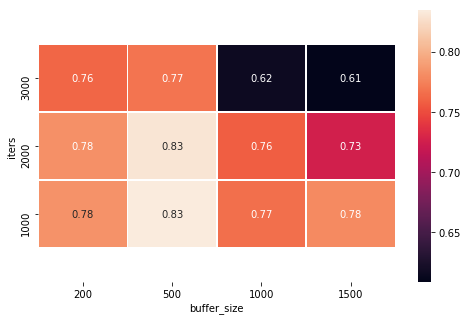

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','Accuracy'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

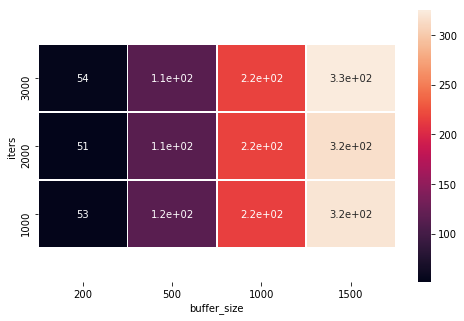

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

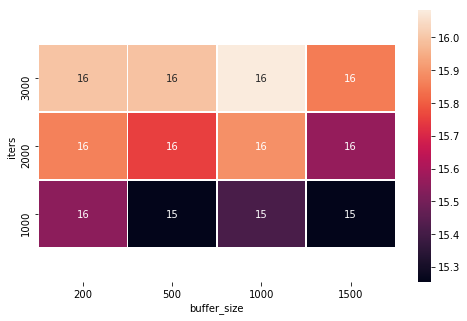

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','buffer_size','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 